In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob

In [2]:
results_path = '../Metrics/results/'

In [3]:
csv_paths = sorted(glob(results_path + '*'))

In [4]:
def get_method(name):
    s = name
    s = s.split('/')[1]
    s = s.split('-', 1)[1]

    if s.startswith('tsne'):
        return s[:7]
    elif s.startswith('dtsne'):
        return 'dtsne'
    elif s.startswith('pca'):
        return s[:6]
    else:
        return s.split('_')[0]

In [5]:
df_metrics = pd.DataFrame()
for p in csv_paths:
    df = pd.read_csv(p)
    df = df.drop(['spat_kl', 'stab_kl'], axis=1)  # Bad metric
    # Extract dataset and method into own column
    df.columns = np.concatenate([['name'], df.columns.values[1:]])
    df['dataset'] = df['name'].str.split('_', 1).str[0].str.extract(r'.*/(.*)-.*')
    df['method'] = df['name'].apply(get_method)
    df = df.set_index('name')
    
    # Average nh and np metrics 
    nh_cols = [c for c in df.columns if 'spat_nh_' in c]
    df['spat_nh_mean'] = np.mean(df[nh_cols], axis=1)

    np_cols = [c for c in df.columns if 'spat_np_' in c]
    df['spat_np_mean'] = np.mean(df[np_cols], axis=1)
    
    np_cols = [c for c in df.columns if 'spat_trust_' in c]
    df['spat_trust_mean'] = np.mean(df[np_cols], axis=1)
    
    np_cols = [c for c in df.columns if 'spat_cont_' in c]
    df['spat_cont_mean'] = np.mean(df[np_cols], axis=1)
    
    df_metrics = pd.concat([df_metrics, df])

In [6]:
np_cols = [c for c in df.columns if 'spat_np_' in c]
np.mean(df[np_cols], axis=1)

name
Output/walk-AE_10f_10f_2f_20ep.csv      0.454562
Output/walk-VAE_100f_10f_2f_20ep.csv    0.446533
Output/walk-tsne_s1_30p.csv             0.523008
Output/walk-tsne_s4_30p.csv             0.376101
Output/walk-dtsne_100p_0-01l.csv        0.369326
Output/walk-pca_s1.csv                  0.461885
Output/walk-pca_s4.csv                  0.460014
dtype: float64

In [7]:
methods = ['AE', 'VAE', 'h_spacer', 'tsne_s1', 'tsne_s4', 'dtsne', 'h_spacer', 'pca_s1', 'pca_s4']
metrics = ['spat_pearson', 'spat_spearman' , 'spat_kendall', 'spat_stress_s', 'v_spacer_1', 'spat_nh_mean', 'spat_np_mean', 'spat_trust_mean', 'spat_cont_mean', 'v_spacer_2', 'stab_pearson', 'stab_spearman' , 'stab_kendall', 'stab_stress_s']
invert_colormap = ['stab_stress_n', 'stab_stress_s', 'spat_stress_n', 'spat_stress_s']

In [8]:
df_metrics.head()

,stab_pearson,stab_spearman,stab_kendall,stab_stress_n,stab_stress_s,spat_pearson,spat_spearman,spat_kendall,spat_stress_n,spat_stress_s,...,spat_cont_0.17,spat_cont_0.18,spat_cont_0.19,spat_cont_0.2,dataset,method,spat_nh_mean,spat_np_mean,spat_trust_mean,spat_cont_mean
name,,,,,,,,,,,,,,,,,,,,,
Output/cartolastd-AE_10f_10f_2f_50ep.csv,0.758707,0.985244,0.908805,0.438282,0.482587,0.898339,0.936295,0.799194,0.149428,0.203321,...,0.881659,0.882222,0.882742,0.883224,cartolastd,AE,0.526636,0.519409,0.932977,0.884297
Output/cartolastd-VAE_10f_10f_2f_100ep.csv,0.864872,0.987680,0.917238,0.256235,0.270257,0.910800,0.949568,0.822211,0.128321,0.178399,...,0.933098,0.932986,0.932710,0.932318,cartolastd,VAE,0.607106,0.629021,0.950780,0.934395
Output/cartolastd-tsne_s1_30p.csv,0.061901,0.075285,0.055938,162.910773,1.876199,0.756324,0.800360,0.615049,1.638506,0.487352,...,0.892884,0.890145,0.887468,0.885040,cartolastd,tsne_s1,0.635575,0.604305,0.947349,0.913302
Output/cartolastd-tsne_s4_30p.csv,0.514560,0.788754,0.655585,1.828781,0.970879,0.685609,0.733679,0.547890,3.641088,0.628783,...,0.758649,0.755195,0.751691,0.748606,cartolastd,tsne_s4,0.567771,0.471428,0.847091,0.806878
Output/cartolastd-dtsne_100p_0-1l.csv,0.141951,-0.030561,-0.023109,25.157685,1.716098,0.768911,0.822515,0.638193,1.966569,0.462177,...,0.889203,0.887006,0.884870,0.882750,cartolastd,dtsne,0.584753,0.571021,0.932634,0.905697


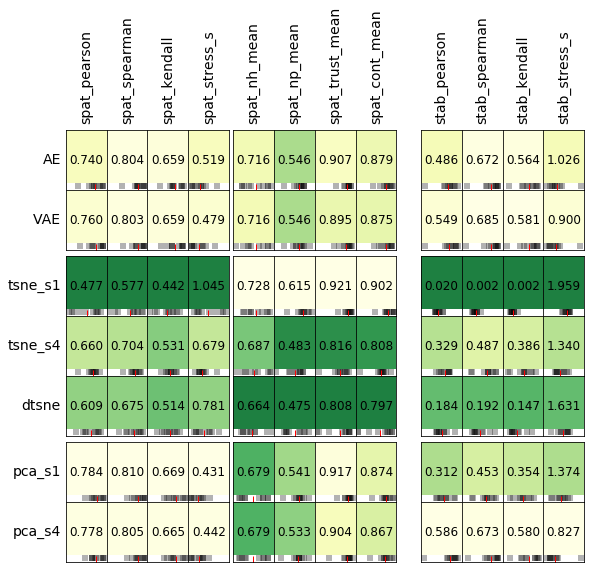

In [9]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

def get_values_for_scatter(method, metric):
    return df_metrics[df_metrics['method'] == method][metric].values, df_metrics[df_metrics['method'] == method][metric].mean()

def make_cell(method, metric, ax):
    
    values, avg = get_values_for_scatter(method, metric)

    colormap_max = max((df_metrics[df_metrics['method'] == m][metric].mean() for m in methods))
    colormap_min = min((df_metrics[df_metrics['method'] == m][metric].mean() for m in methods))
    metric_max = max(df_metrics[metric])
    metric_min = min(df_metrics[metric])

    interval = abs(colormap_max - colormap_min)
    if metric in invert_colormap:
        cmap = plt.cm.get_cmap('YlGn')        
        norm = matplotlib.colors.Normalize(vmin=colormap_min, 
                                           vmax=colormap_max + 0.3 * interval)        
    else:
        cmap = plt.cm.get_cmap('YlGn_r')
        norm = matplotlib.colors.Normalize(vmin=colormap_min - 0.3 * interval, 
                                           vmax=colormap_max)

    cell_color = cmap(norm(avg))
    ax.set_facecolor(cell_color)
    
    white_bar = Rectangle((0,0), 1, 0.12)
    pc = PatchCollection([white_bar], facecolor='w',edgecolor='w', transform=ax.transAxes)
    ax.add_collection(pc)


    ax.plot(values, np.zeros(len(values)), 'ks', alpha=0.3, fillstyle='full', markeredgewidth=0.0)
    ax.plot([avg], [-0.0005], 'r|', ms=10)
    text = str(avg)[:5]
    
    ax.text(0.5, 0.5, text, ha='center', va='center', fontsize=12, transform=ax.transAxes) # Need to be sure of the center
    ax.set_ylim((-0.0007, 0.01))
    ax.set_xlim((metric_min - 0.3 * interval, metric_max + 0.3 * interval))
    plt.subplots_adjust(left=0.1, right=0.9, top=1.0, bottom=0.0)    
    ax.set_yticks([])
    ax.set_xticks([])
    
widths = [1.0] * 4 + [0.1] + [1.0] * 4 + [0.6] + [1.0] * 4
heights = [1.0] * 2 + [0.1] + [1.0] * 3 + [0.1] + [1.0] * 2
fig, axs = plt.subplots(9, 14, sharex='col', sharey='row', figsize=(9,6),
                        gridspec_kw={'hspace': 0, 'wspace': 0, 
                                     'width_ratios':widths, 'height_ratios':heights})

for col_index, metric in enumerate(metrics):
    if metric.startswith('v_spacer'):
        for row_index, method in enumerate(methods):
            ax = axs[row_index, col_index]
            ax.set_visible(False)
    else:        
        for row_index, method in enumerate(methods):
            if method == 'h_spacer':
                ax = axs[row_index, col_index]
                ax.set_visible(False)
            else:                
                ax = axs[row_index, col_index]

                if col_index == 0:
                    ax.set_ylabel(method, rotation=0, ha='right', va='center', labelpad=5, fontsize=14)
                if row_index == 0:
                    ax.set_title(metric, rotation=90, ha='center', va='bottom', fontsize=14)
                
                make_cell(method, metric, ax)


In [10]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
fig.savefig('f1_YlGn.png', bbox_inches='tight')

In [11]:
# Figure 2 - all datasets summary in one page

In [12]:
metrics_0 = ['spat_pearson', 'spat_spearman' , 'spat_kendall', 'spat_stress_s'] 
metrics_1 = [c for c in df_metrics.columns if c.startswith('spat_nh_') and 'mean' not in c]
metrics_2 = [c for c in df_metrics.columns if c.startswith('spat_np_') and 'mean' not in c]
metrics_3 = [c for c in df_metrics.columns if c.startswith('spat_trust_') and 'mean' not in c]
metrics_4 = [c for c in df_metrics.columns if c.startswith('spat_cont_') and 'mean' not in c]
metrics_5 = ['stab_pearson', 'stab_spearman' , 'stab_kendall', 'stab_stress_s']

metrics = metrics_0 + metrics_1 + metrics_2 + metrics_3 + metrics_4 + metrics_5 
n_metrics = len(metrics)

In [13]:
n_datasets = len(df_metrics['dataset'].unique())
n_runs = df_metrics.shape[0]

In [14]:
datasets = ['cartolastd', 'cifar10cnn', 'esc50', 'gaussians',
            'nnset', 'qtables', 'sorts', 'walk', 'fashion', 'quickdraw']

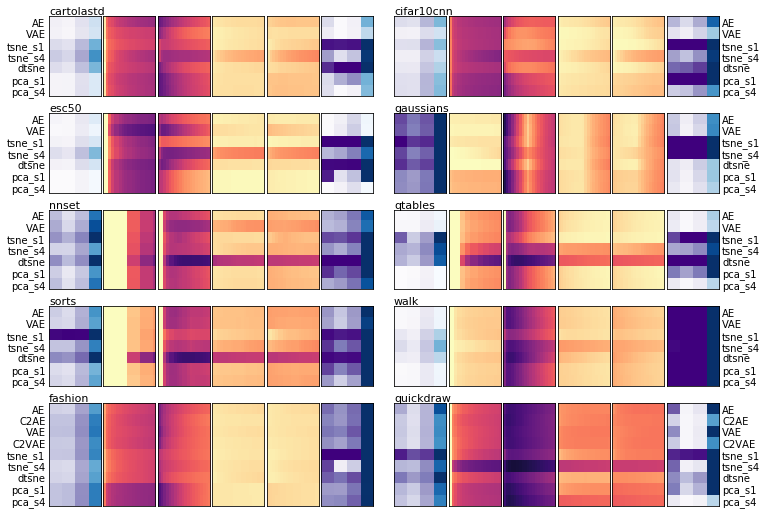

In [23]:
def plot_corr_and_stress(ax, df):
    matrix = df.values
    metric_ids = df.columns
    dataset_ids = df.index

    # Display the first 3 columns (correlations) with colormap in range [0,1]
    m = np.ones_like(matrix)
    m[:, 0:3] = 0
    masked = np.ma.masked_array(matrix, m)
    colormap = plt.cm.Purples_r
    mat = ax.matshow(masked, cmap=colormap, aspect='auto')
    mat.set_clim(0, 1)

    # Display the last 2 columns (stress) with different colormap
    m = np.ones_like(matrix)
    m[:, 3:] = 0
    masked = np.ma.masked_array(matrix, m)
    colormap = plt.cm.Blues
    mat = ax.matshow(masked, cmap=colormap, aspect='auto')
    mat.set_clim(0, 1)

        
    ax.tick_params(axis=u'both', which=u'both', length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])    
    
def plot_k_based(ax, df):
    matrix = df.values
    colormap = plt.cm.magma
    mat = ax.matshow(matrix, cmap=colormap, aspect='auto')
    mat.set_clim(0, 1)
    ax.tick_params(axis=u'both', which=u'both', length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

fig, axs = plt.subplots(nrows=n_datasets//2, ncols=13, figsize=(12, 9),
                        gridspec_kw={'width_ratios': [1,1,1,1,1,1, 0.3, 1,1,1,1,1,1],
                                     'height_ratios': [1,1,1,1,9/7],
                                     'wspace': 0.05})

for i, dataset in enumerate(datasets):
    df = df_metrics[df_metrics['dataset'] == dataset]
    row_index = i // 2
    col_index = (i % 2) * 7
    
    ax = axs[row_index, col_index + 0]
    df_0 = df[metrics_0 + ['method']]
    df_0 = df_0.set_index('method')
#     plot_matrix(ax, df_0, invert_colormap=['spat_stress_n', 'spat_stress_s'])
    plot_corr_and_stress(ax, df_0)
    if col_index == 0:    
        ax.set_yticklabels(df_0.index)
        ax.set_yticks(range(len(df_0)), minor=False)
    ax.set_title(dataset, loc='left', ha='left', va='bottom', pad=0, fontsize=11)

    ax = axs[row_index, col_index + 1]
    df_1 = df[metrics_1 + ['method']]
    df_1 = df_1.set_index('method')
    plot_k_based(ax, df_1)
    
    ax = axs[row_index, col_index + 2]
    df_2 = df[metrics_2 + ['method']]
    df_2 = df_2.set_index('method')
    plot_k_based(ax, df_2)
    
    ax = axs[row_index, col_index + 3]
    df_3 = df[metrics_3 + ['method']]
    df_3 = df_3.set_index('method')
    plot_k_based(ax, df_3)
    
    ax = axs[row_index, col_index + 4]
    df_4 = df[metrics_4 + ['method']]
    df_4 = df_4.set_index('method')
    plot_k_based(ax, df_4)
    
    
    ax = axs[row_index, col_index + 5]
    df_5 = df[metrics_5 + ['method']]
    df_5 = df_5.set_index('method')
    plot_corr_and_stress(ax, df_5)    
    if col_index == 7:
        ax.yaxis.tick_right()
        ax.set_yticklabels(df_0.index)
        ax.set_yticks(range(len(df_0)), minor=False)
        
for i in range(n_datasets//2):
    axs[i,6].set_visible(False)


In [24]:
fig.savefig('f2.pdf', bbox_inches='tight')

In [17]:
# import numpy as np
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# from matplotlib import cm
# # from colorspacious import cspace_converter
# from collections import OrderedDict

# cmaps = OrderedDict()

# cmaps['bad (left) to good (right)'] = ['YlGn_r', 'Purples_r', 'Blues_r', 'magma']

# nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
# gradient = np.linspace(0, 1, 256)
# gradient = np.vstack((gradient, gradient))

# def plot_color_gradients(cmap_category, cmap_list, nrows):
#     fig, axes = plt.subplots(nrows=nrows)
#     fig.subplots_adjust(top=0.99, bottom=0.01, left=0.2, right=0.99)
#     axes[0].set_title(cmap_category, fontsize=14)

#     for ax, name in zip(axes, cmap_list):
#         ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
#         pos = list(ax.get_position().bounds)
#         x_text = pos[0] - 0.01
#         y_text = pos[1] + pos[3]/2.
# #         fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

#     # Turn off *all* ticks & spines, not just the ones with colormaps.
#     for ax in axes:
#         ax.set_axis_off()
#     fig.savefig('cmaps.pdf', bbox_inches='tight')


# for cmap_category, cmap_list in cmaps.items():
#     plot_color_gradients(cmap_category, cmap_list, nrows)

# plt.show()